In [1]:
import pandas as pd
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
articles = pd.read_csv('../Data/Gaza_textcontain_before_new.csv')
authors = pd.read_csv('../Data/Gaza_textcontain_before_new_authors.csv')

In [3]:
# date published
#remoe where published time = published time not found

articles = articles.drop(articles[articles['published_time'] == 'Published time not found'].index)

articles['published_time'] = articles['published_time'].str[11:]
articles['published_time'] = articles['published_time'].str[:12]
#to date mmm dd, yyyy
articles['published_time'] = pd.to_datetime(articles['published_time'], format='%b %d, %Y')
articles

article_title                 author  \
0    Various celebrations held across world to cele...              By Xinhua   
1    First Saudi ambassador to Palestine arrives in...              By Xinhua   
2    China releases a white paper on its proposals ...  By GT staff reporters   
3                 Kaparot ceremony in Tel Aviv, Israel              By Xinhua   
4    1,100 Gazan kidney patients facing drug shorta...              By Xinhua   
..                                                 ...                    ...   
477  F-35: Closer Look at Colossally Costly Jet Tha...             By Sputnik   
478  Toxic explosion in Nebraska shows US unable to...             By Xu Yelu   
479  Palestine sends rescue team to floods-hit east...              By Xinhua   
480  Armed clashes in Palestinian refugee camp inte...              By Xinhua   
481  Greek scholar believes in ‘endless possibiliti...              Xu Liuliu   

    published_time                                       article_text  \
0       2023-09-29  Australian youths sing Chinese version of the ...   
1       2023-09-27  Saudi ambassador to Palestine Naif bin Bandar ...   
2       2023-09-26  Photo: Li Xuanmin/GT The Chinese government re...   
3       2023-09-22  Ultra Orthodox Jews perform the Kaparot ceremo...   
4       2023-09-21  A young Palestinian patient receives treatment...   
..             ...                                                ...   
477     2023-09-21  A US Marine Corps F-35B went down over South C...   
478     2023-09-15  A resident of East Palestine in the state of O...   
479     2023-09-14  Rescuers of a Palestinian rescue team prepare ...   
480     2023-09-14  Palestinians from Ain Al-Helweh camp prepare t...   
481     2023-09-14  The University of Athens Photo: VCGChongqing, ...   

    article_category_one article_category_two  \
0                  PHOTO                WORLD   
1                  PHOTO                WORLD   
2                  CHINA             POLITICS   
3                  PHOTO                WORLD   
4                  PHOTO                WORLD   
..                   ...                  ...   
477                WORLD             AMERICAS   
478                WORLD             AMERICAS   
479                PHOTO                WORLD   
480                PHOTO                WORLD   
481                 ARTS    CULTURE & LEISURE   

                                   picture_description  
0    Australian youths sing Chinese version of the ...  
1    Saudi ambassador to Palestine Naif bin Bandar ...  
2                                 Photo: Li Xuanmin/GT  
3    Ultra Orthodox Jews perform the Kaparot ceremo...  
4    A young Palestinian patient receives treatment...  
..                                                 ...  
477                      Picture description not found  
478  A resident of East Palestine in the state of O...  
479  Rescuers of a Palestinian rescue team prepare ...  
480  Palestinians from Ain Al-Helweh camp prepare t...  
481                The University of Athens Photo: VCG  

[482 rows x 7 columns]

In [4]:
#stats published time
articles['author']

0                  By Xinhua
1                  By Xinhua
2      By GT staff reporters
3                  By Xinhua
4                  By Xinhua
               ...          
477               By Sputnik
478               By Xu Yelu
479                By Xinhua
480                By Xinhua
481                Xu Liuliu
Name: author, Length: 482, dtype: object

In [5]:
# celan authors
articles['author'] = articles['author'].apply(lambda x: x[3:] if x.startswith("By ") else x)
articles

article_title              author  \
0    Various celebrations held across world to cele...              Xinhua   
1    First Saudi ambassador to Palestine arrives in...              Xinhua   
2    China releases a white paper on its proposals ...  GT staff reporters   
3                 Kaparot ceremony in Tel Aviv, Israel              Xinhua   
4    1,100 Gazan kidney patients facing drug shorta...              Xinhua   
..                                                 ...                 ...   
477  F-35: Closer Look at Colossally Costly Jet Tha...             Sputnik   
478  Toxic explosion in Nebraska shows US unable to...             Xu Yelu   
479  Palestine sends rescue team to floods-hit east...              Xinhua   
480  Armed clashes in Palestinian refugee camp inte...              Xinhua   
481  Greek scholar believes in ‘endless possibiliti...           Xu Liuliu   

    published_time                                       article_text  \
0       2023-09-29  Australian youths sing Chinese version of the ...   
1       2023-09-27  Saudi ambassador to Palestine Naif bin Bandar ...   
2       2023-09-26  Photo: Li Xuanmin/GT The Chinese government re...   
3       2023-09-22  Ultra Orthodox Jews perform the Kaparot ceremo...   
4       2023-09-21  A young Palestinian patient receives treatment...   
..             ...                                                ...   
477     2023-09-21  A US Marine Corps F-35B went down over South C...   
478     2023-09-15  A resident of East Palestine in the state of O...   
479     2023-09-14  Rescuers of a Palestinian rescue team prepare ...   
480     2023-09-14  Palestinians from Ain Al-Helweh camp prepare t...   
481     2023-09-14  The University of Athens Photo: VCGChongqing, ...   

    article_category_one article_category_two  \
0                  PHOTO                WORLD   
1                  PHOTO                WORLD   
2                  CHINA             POLITICS   
3                  PHOTO                WORLD   
4                  PHOTO                WORLD   
..                   ...                  ...   
477                WORLD             AMERICAS   
478                WORLD             AMERICAS   
479                PHOTO                WORLD   
480                PHOTO                WORLD   
481                 ARTS    CULTURE & LEISURE   

                                   picture_description  
0    Australian youths sing Chinese version of the ...  
1    Saudi ambassador to Palestine Naif bin Bandar ...  
2                                 Photo: Li Xuanmin/GT  
3    Ultra Orthodox Jews perform the Kaparot ceremo...  
4    A young Palestinian patient receives treatment...  
..                                                 ...  
477                      Picture description not found  
478  A resident of East Palestine in the state of O...  
479  Rescuers of a Palestinian rescue team prepare ...  
480  Palestinians from Ain Al-Helweh camp prepare t...  
481                The University of Athens Photo: VCG  

[482 rows x 7 columns]

In [6]:
[articles['author'].unique(), authors['author_name'].unique()]

[array(['Xinhua', 'GT staff reporters', 'Sputnik', 'Xu Yelu', 'Xu Liuliu',
        'Yang Sheng', 'Global Times', 'Lou Kang', 'VCG', 'Deng Xiaoci',
        'Wan Hengyi', 'WAM', 'Yin Yeping', 'Long Xingchun and Wang Geyan',
        'Mark Blacklock', 'Qi Xijia', 'Liu Xin', 'Maitreya Bhakal',
        'Ding Long', 'Lu Wenao', 'Zhao Xiaozhuo', 'Wang Qi',
        'Bradley Blankenship', 'Anthony Moretti', 'Kishore Mahbubani',
        'Xie Wenting and Bai Yunyi', 'Fan Anqi', 'Author not found',
        'Zhang Hua', 'Bai Yunyi', 'Ebrahim Hashem', 'Dakotah Lilly',
        'Xin Ping', 'IC'], dtype=object),
 array(['Xu Liuliu', 'Yang Sheng', 'Deng Xiaoci', 'Liu Xin', 'Wang Qi',
        'Bradley Blankenship'], dtype=object)]

In [7]:
articles['article_text'] = articles.apply(lambda x: x['article_text'].replace(x['picture_description'], ''), axis=1)
articles

article_title              author  \
0    Various celebrations held across world to cele...              Xinhua   
1    First Saudi ambassador to Palestine arrives in...              Xinhua   
2    China releases a white paper on its proposals ...  GT staff reporters   
3                 Kaparot ceremony in Tel Aviv, Israel              Xinhua   
4    1,100 Gazan kidney patients facing drug shorta...              Xinhua   
..                                                 ...                 ...   
477  F-35: Closer Look at Colossally Costly Jet Tha...             Sputnik   
478  Toxic explosion in Nebraska shows US unable to...             Xu Yelu   
479  Palestine sends rescue team to floods-hit east...              Xinhua   
480  Armed clashes in Palestinian refugee camp inte...              Xinhua   
481  Greek scholar believes in ‘endless possibiliti...           Xu Liuliu   

    published_time                                       article_text  \
0       2023-09-29   Musicians perform during a Mid-Autumn Festiva...   
1       2023-09-27   \n\nSaudi ambassador to Palestine Naif bin Ba...   
2       2023-09-26   The Chinese government released a white paper...   
3       2023-09-22   \n\nUltra Orthodox Jews perform the Kaparot c...   
4       2023-09-21   \n\nA young Palestinian patient receives trea...   
..             ...                                                ...   
477     2023-09-21  A US Marine Corps F-35B went down over South C...   
478     2023-09-15  Barely two months after an explosion in Louisi...   
479     2023-09-14   \n\nA rescuer of a Palestinian rescue team pr...   
480     2023-09-14   \n\nDisplaced Palestinian children wait to mo...   
481     2023-09-14  Chongqing, Sichuan, Shandong… Stelios Virvidak...   

    article_category_one article_category_two  \
0                  PHOTO                WORLD   
1                  PHOTO                WORLD   
2                  CHINA             POLITICS   
3                  PHOTO                WORLD   
4                  PHOTO                WORLD   
..                   ...                  ...   
477                WORLD             AMERICAS   
478                WORLD             AMERICAS   
479                PHOTO                WORLD   
480                PHOTO                WORLD   
481                 ARTS    CULTURE & LEISURE   

                                   picture_description  
0    Australian youths sing Chinese version of the ...  
1    Saudi ambassador to Palestine Naif bin Bandar ...  
2                                 Photo: Li Xuanmin/GT  
3    Ultra Orthodox Jews perform the Kaparot ceremo...  
4    A young Palestinian patient receives treatment...  
..                                                 ...  
477                      Picture description not found  
478  A resident of East Palestine in the state of O...  
479  Rescuers of a Palestinian rescue team prepare ...  
480  Palestinians from Ain Al-Helweh camp prepare t...  
481                The University of Athens Photo: VCG  

[482 rows x 7 columns]

In [8]:
#drop duplicates
authors.drop_duplicates(inplace=True)
#merge articles and authors
df =  articles.join(authors.set_index('author_name'), on='author', how='left')
df.replace(pd.NA, 'Author details not found', inplace=True)
df

article_title              author  \
0    Various celebrations held across world to cele...              Xinhua   
1    First Saudi ambassador to Palestine arrives in...              Xinhua   
2    China releases a white paper on its proposals ...  GT staff reporters   
3                 Kaparot ceremony in Tel Aviv, Israel              Xinhua   
4    1,100 Gazan kidney patients facing drug shorta...              Xinhua   
..                                                 ...                 ...   
477  F-35: Closer Look at Colossally Costly Jet Tha...             Sputnik   
478  Toxic explosion in Nebraska shows US unable to...             Xu Yelu   
479  Palestine sends rescue team to floods-hit east...              Xinhua   
480  Armed clashes in Palestinian refugee camp inte...              Xinhua   
481  Greek scholar believes in ‘endless possibiliti...           Xu Liuliu   

    published_time                                       article_text  \
0       2023-09-29   Musicians perform during a Mid-Autumn Festiva...   
1       2023-09-27   \n\nSaudi ambassador to Palestine Naif bin Ba...   
2       2023-09-26   The Chinese government released a white paper...   
3       2023-09-22   \n\nUltra Orthodox Jews perform the Kaparot c...   
4       2023-09-21   \n\nA young Palestinian patient receives trea...   
..             ...                                                ...   
477     2023-09-21  A US Marine Corps F-35B went down over South C...   
478     2023-09-15  Barely two months after an explosion in Louisi...   
479     2023-09-14   \n\nA rescuer of a Palestinian rescue team pr...   
480     2023-09-14   \n\nDisplaced Palestinian children wait to mo...   
481     2023-09-14  Chongqing, Sichuan, Shandong… Stelios Virvidak...   

    article_category_one article_category_two  \
0                  PHOTO                WORLD   
1                  PHOTO                WORLD   
2                  CHINA             POLITICS   
3                  PHOTO                WORLD   
4                  PHOTO                WORLD   
..                   ...                  ...   
477                WORLD             AMERICAS   
478                WORLD             AMERICAS   
479                PHOTO                WORLD   
480                PHOTO                WORLD   
481                 ARTS    CULTURE & LEISURE   

                                   picture_description  \
0    Australian youths sing Chinese version of the ...   
1    Saudi ambassador to Palestine Naif bin Bandar ...   
2                                 Photo: Li Xuanmin/GT   
3    Ultra Orthodox Jews perform the Kaparot ceremo...   
4    A young Palestinian patient receives treatment...   
..                                                 ...   
477                      Picture description not found   
478  A resident of East Palestine in the state of O...   
479  Rescuers of a Palestinian rescue team prepare ...   
480  Palestinians from Ain Al-Helweh camp prepare t...   
481                The University of Athens Photo: VCG   

                 author_title  \
0    Author details not found   
1    Author details not found   
2    Author details not found   
3    Author details not found   
4    Author details not found   
..                        ...   
477  Author details not found   
478  Author details not found   
479  Author details not found   
480  Author details not found   
481         Reporter, Beijing   

                                    author_description  
0                             Author details not found  
1                             Author details not found  
2                             Author details not found  
3                             Author details not found  
4                             Author details not found  
..                                                 ...  
477                           Author details not found  
478                           Author details not found  
479                           A

In [9]:
# Saving data to csv
df.to_csv('../Data/gaza_textcontain_before_new_preprocessed.csv')

In [10]:
#senance count
df['sentence_count'] = df['article_text'].apply(lambda x: len(x.split('.')) - 1)

In [11]:
#word count using tokenization
#remove stopwords
stop_words = set(stopwords.words('english'))

In [12]:
#word count using tokenization
df['word_count'] = df['article_text'].apply(lambda x: len([word for word in word_tokenize(x) if word.isalpha()]))

In [13]:
# part of speech count using tokenization wihout stopwords
nltk.download('averaged_perceptron_tagger')
df['pos_count'] = df['article_text'].apply(lambda x: FreqDist([tag for word, tag in nltk.pos_tag(word_tokenize(x)) if word.isalpha() and word not in stop_words]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
df['pos_count'].tolist()

[FreqDist({'NNP': 44, 'NN': 19, 'NNS': 10, 'JJ': 6, 'VBN': 6, 'IN': 5, 'VBD': 3, 'VBP': 2, 'VBG': 2, 'NNPS': 1, ...}),
 FreqDist({'NNP': 56, 'NN': 47, 'JJ': 22, 'NNS': 17, 'VBD': 13, 'VBG': 5, 'VBN': 4, 'VBZ': 3, 'IN': 3, 'VB': 3, ...}),
 FreqDist({'NN': 181, 'JJ': 129, 'NNS': 93, 'NNP': 54, 'VBG': 34, 'RB': 21, 'VB': 20, 'VBN': 19, 'VBD': 18, 'DT': 14, ...}),
 FreqDist({'NNP': 21, 'NN': 10, 'JJ': 9, 'NNS': 2, 'VBN': 2, 'RB': 2, 'NNPS': 1, 'VB': 1, 'DT': 1, 'VBZ': 1}),
 FreqDist({'NN': 42, 'NNP': 24, 'NNS': 21, 'JJ': 20, 'VBD': 7, 'VBN': 5, 'IN': 4, 'VBG': 4, 'JJS': 2, 'VBP': 2, ...}),
 FreqDist({'NN': 214, 'NNP': 188, 'JJ': 89, 'NNS': 79, 'VBN': 41, 'VBG': 39, 'VBD': 38, 'DT': 24, 'VB': 24, 'RB': 22, ...}),
 FreqDist({'NN': 83, 'JJ': 38, 'NNP': 36, 'NNS': 34, 'VBD': 19, 'VBG': 11, 'RB': 8, 'VB': 8, 'VBN': 5, 'CD': 4, ...}),
 FreqDist({'NN': 33, 'NNP': 32, 'NNS': 17, 'JJ': 16, 'VBG': 11, 'VBN': 10, 'VBD': 9, 'VB': 8, 'JJS': 4, 'DT': 2, ...}),
 FreqDist({'NNP': 39, 'NN': 18, 'NNS': 9, '

In [15]:
#pos count to data frame
df_pos = pd.DataFrame(df['pos_count'].tolist())
df_pos.fillna(0, inplace=True)
df_pos['sentence_count'] = df['sentence_count']
df_pos['word_count'] = df['word_count']
df_pos

NNS  VBP    NNP   VBD     NN     JJ   VBN    IN  NNPS   VBG  ...   EX  \
0    10.0  2.0   44.0   3.0   19.0    6.0   6.0   5.0   1.0   2.0  ...  0.0   
1    17.0  1.0   56.0  13.0   47.0   22.0   4.0   3.0   1.0   5.0  ...  0.0   
2    93.0  6.0   54.0  18.0  181.0  129.0  19.0   9.0   0.0  34.0  ...  0.0   
3     2.0  0.0   21.0   0.0   10.0    9.0   2.0   0.0   1.0   0.0  ...  0.0   
4    21.0  2.0   24.0   7.0   42.0   20.0   5.0   4.0   0.0   4.0  ...  0.0   
..    ...  ...    ...   ...    ...    ...   ...   ...   ...   ...  ...  ...   
477  79.0  4.0  188.0  38.0  214.0   89.0  41.0  19.0   1.0  39.0  ...  0.0   
478  34.0  1.0   36.0  19.0   83.0   38.0   5.0   2.0   1.0  11.0  ...  1.0   
479  17.0  0.0   32.0   9.0   33.0   16.0  10.0   0.0   1.0  11.0  ...  0.0   
480   9.0  1.0   39.0   2.0   18.0    6.0   2.0   0.0   3.0   0.0  ...  0.0   
481  69.0  8.0   98.0  19.0  109.0   77.0  15.0  15.0   0.0  17.0  ...  2.0   

     PRP$   FW   UH  PDT   RP  WDT  WP$  sentence_count  word_count  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0              15         154  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0              12         313  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0              33        1000  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0               4          76  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0               8         222  
..    ...  ...  ...  ...  ...  ...  ...             ...         ...  
477   0.0  0.0  0.0  0.0  0.0  0.0  0.0              60        1305  
478   0.0  0.0  0.0  0.0  0.0  0.0  0.0              18         432  
479   0.0  0.0  0.0  0.0  0.0  0.0  0.0              12         245  
480   0.0  0.0  0.0  0.0  0.0  0.0  0.0               5         131  
481   0.0  0.0  0.0  0.0  0.0  0.0  0.0              43         880  

[482 rows x 34 columns]

## Visualizations

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go


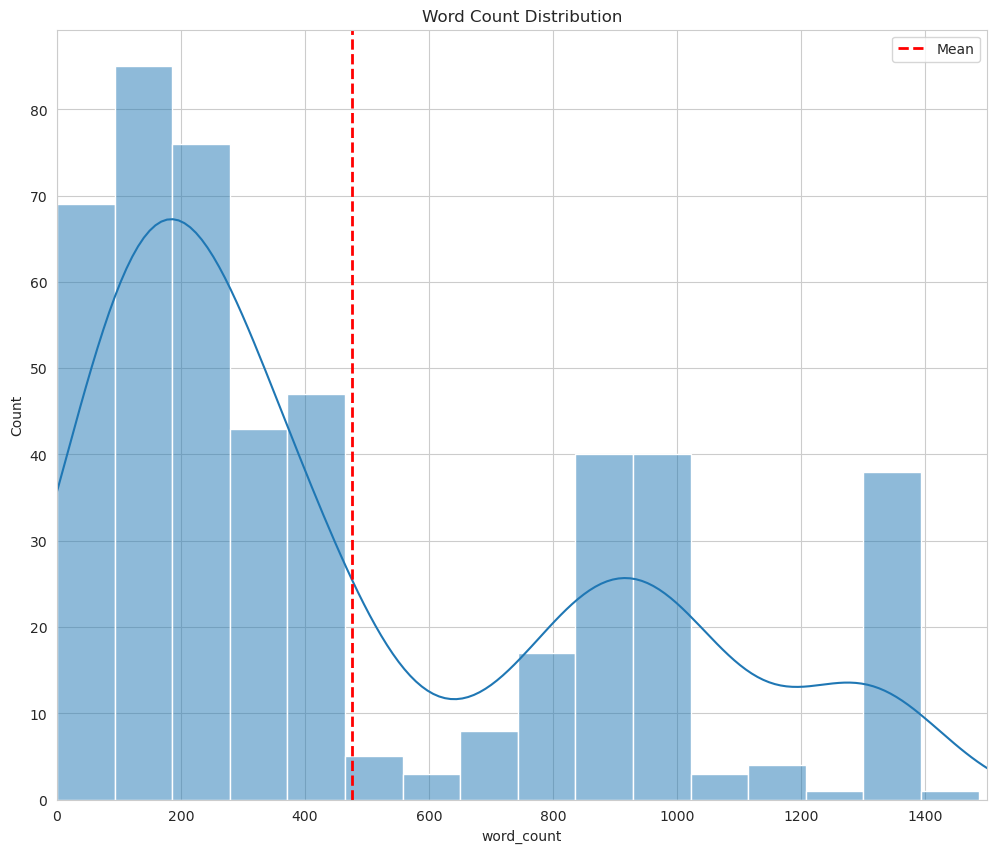

In [17]:
#word count; cut at 1000
plt.figure(figsize=(12, 10))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.xlim(0, 1500)
#mean line
plt.axvline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Word Count Distribution')
plt.show()

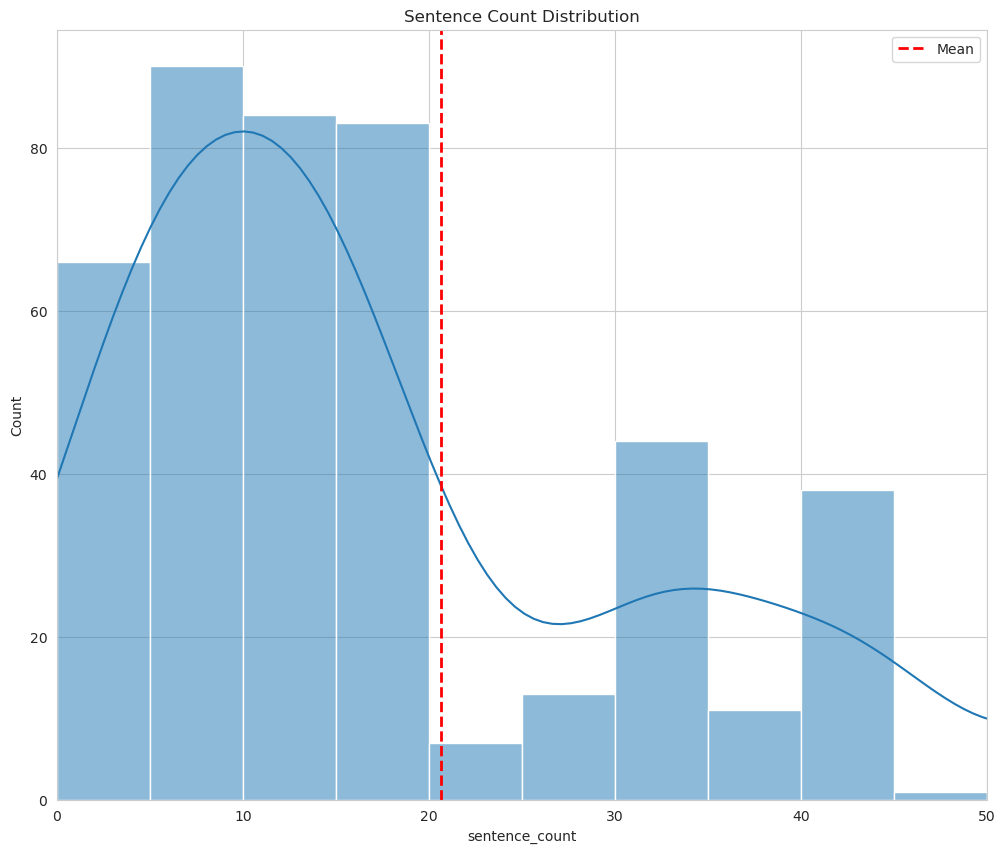

In [18]:
#sentence count; cut at 100
plt.figure(figsize=(12, 10))
sns.histplot(df['sentence_count'], bins=20, kde=True)
plt.xlim(0,50)
#mean line
plt.axvline(df['sentence_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Sentence Count Distribution')
plt.show()


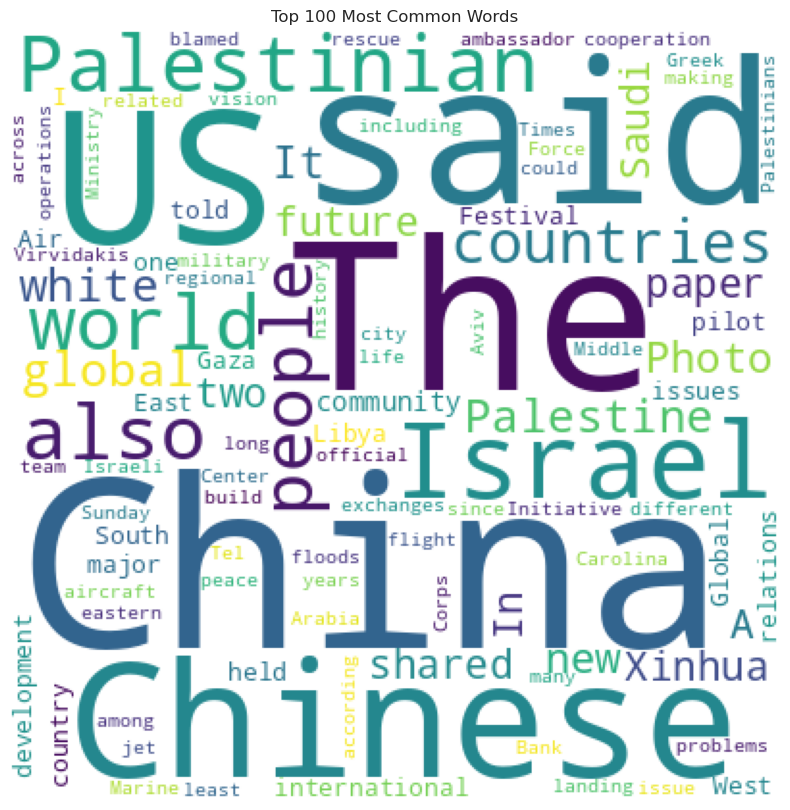

In [19]:
#wordcloud form freqdist
fdist = FreqDist([word for word in word_tokenize(' '.join(df['article_text'])) if word.isalpha() and word not in stop_words])
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

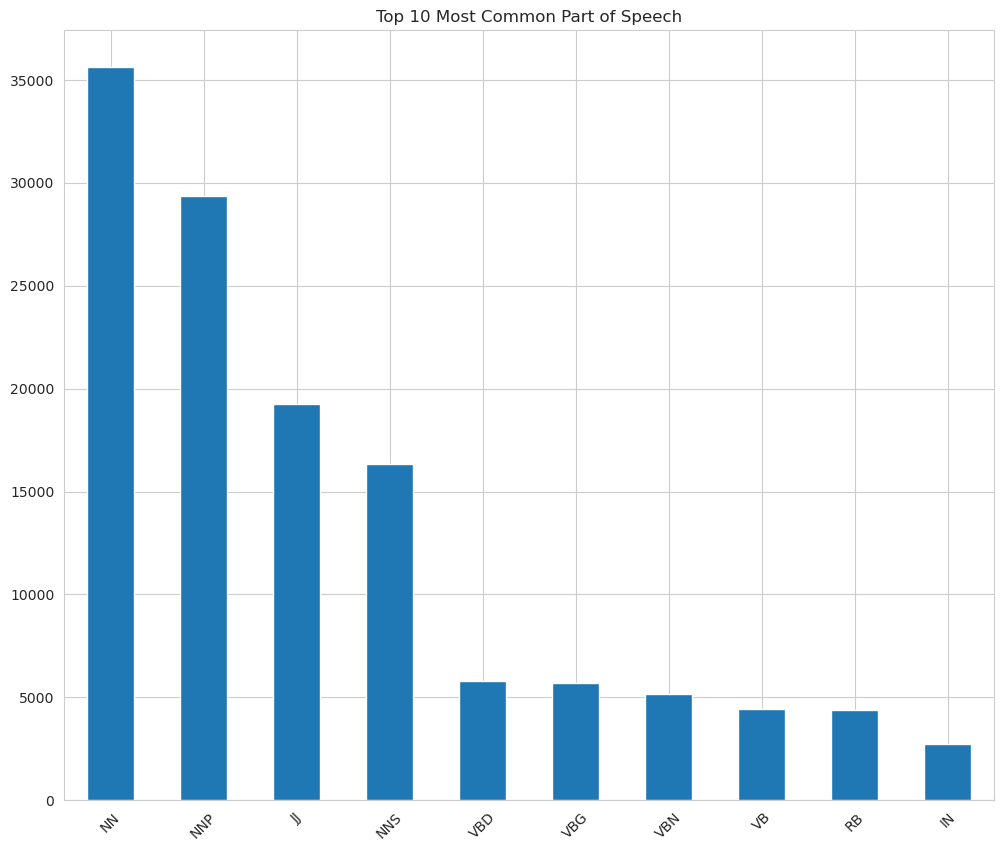

In [20]:
#top 10 most common part of speech
plt.figure(figsize=(12, 10))
df_pos.drop(columns=['sentence_count', 'word_count']).sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Common Part of Speech')
#turn x labels
plt.xticks(rotation=45)
plt.show()

### Total POS

In [21]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="RB" and word.isalpha() and word not in stop_words])

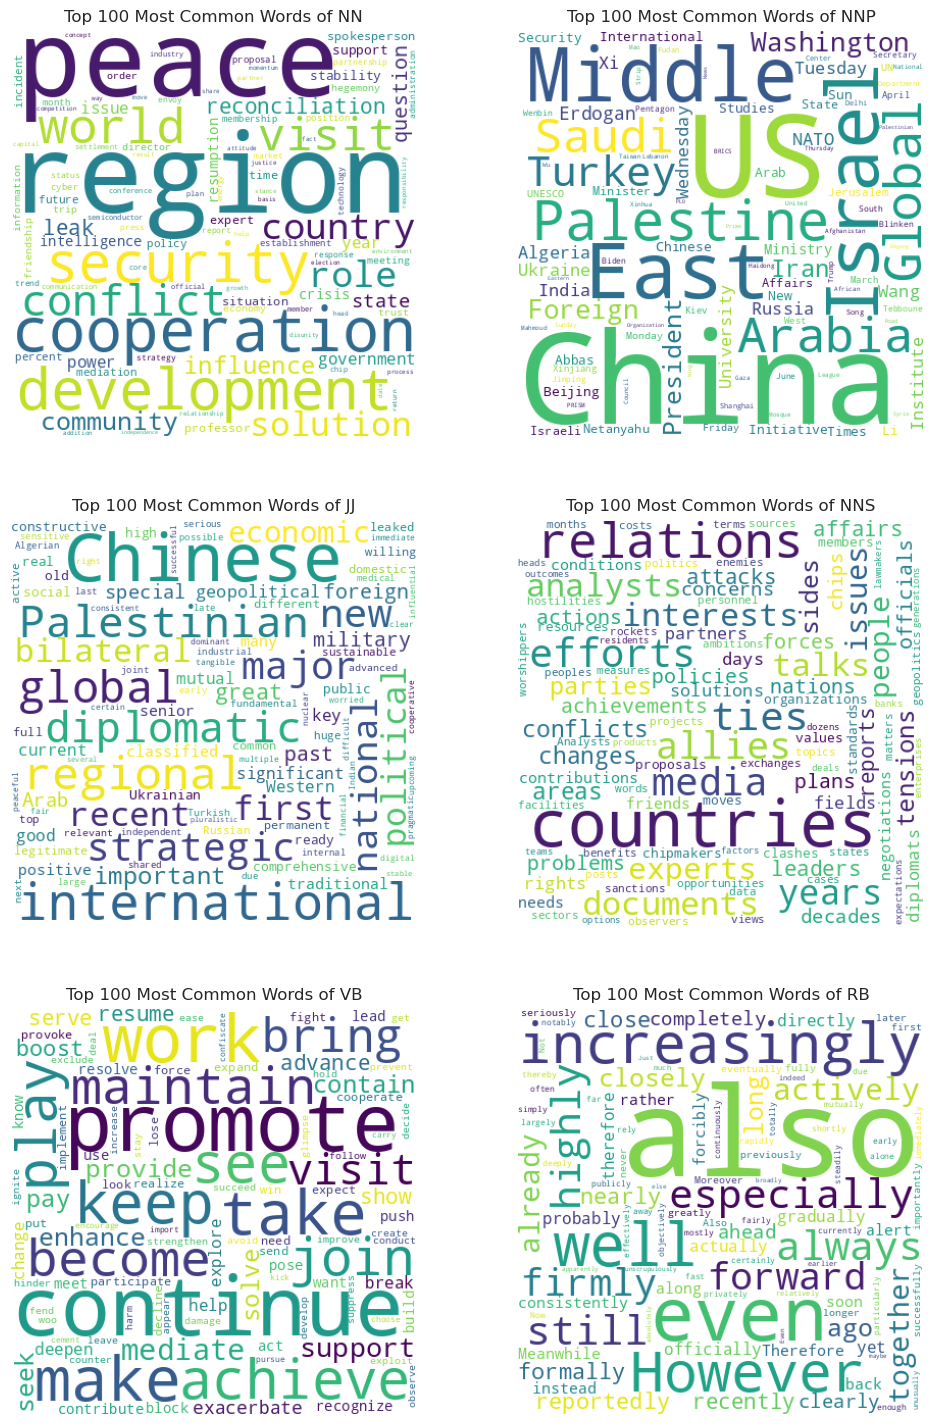

In [31]:
plt.figure(figsize=(12, 18))
plt.subplot(3, 2, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(3, 2, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(3, 2, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(3, 2, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(3, 2, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


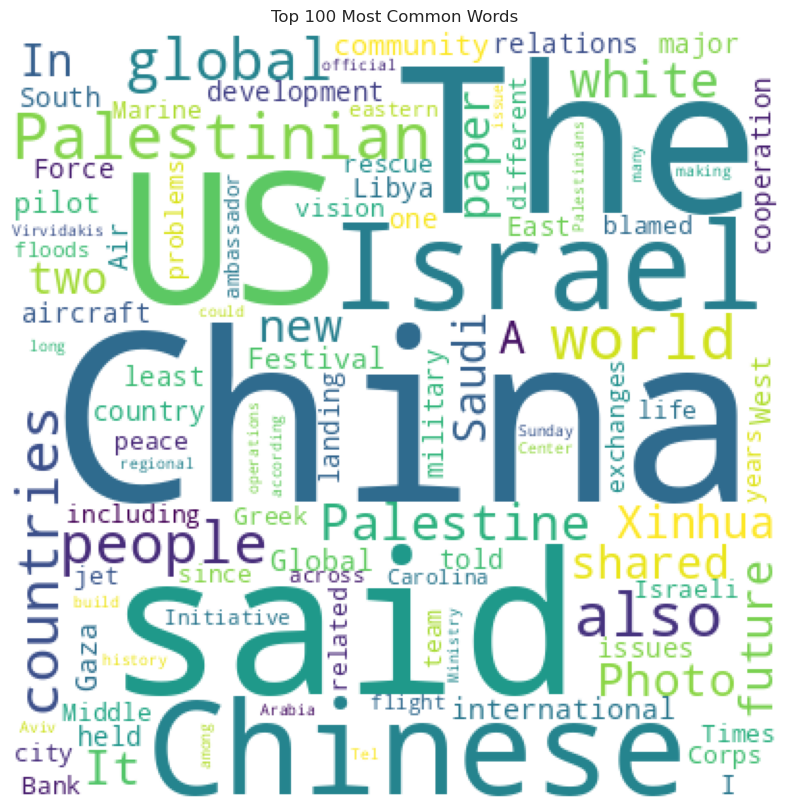

In [32]:
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

Text(0.5, 1.0, 'Article Categories')

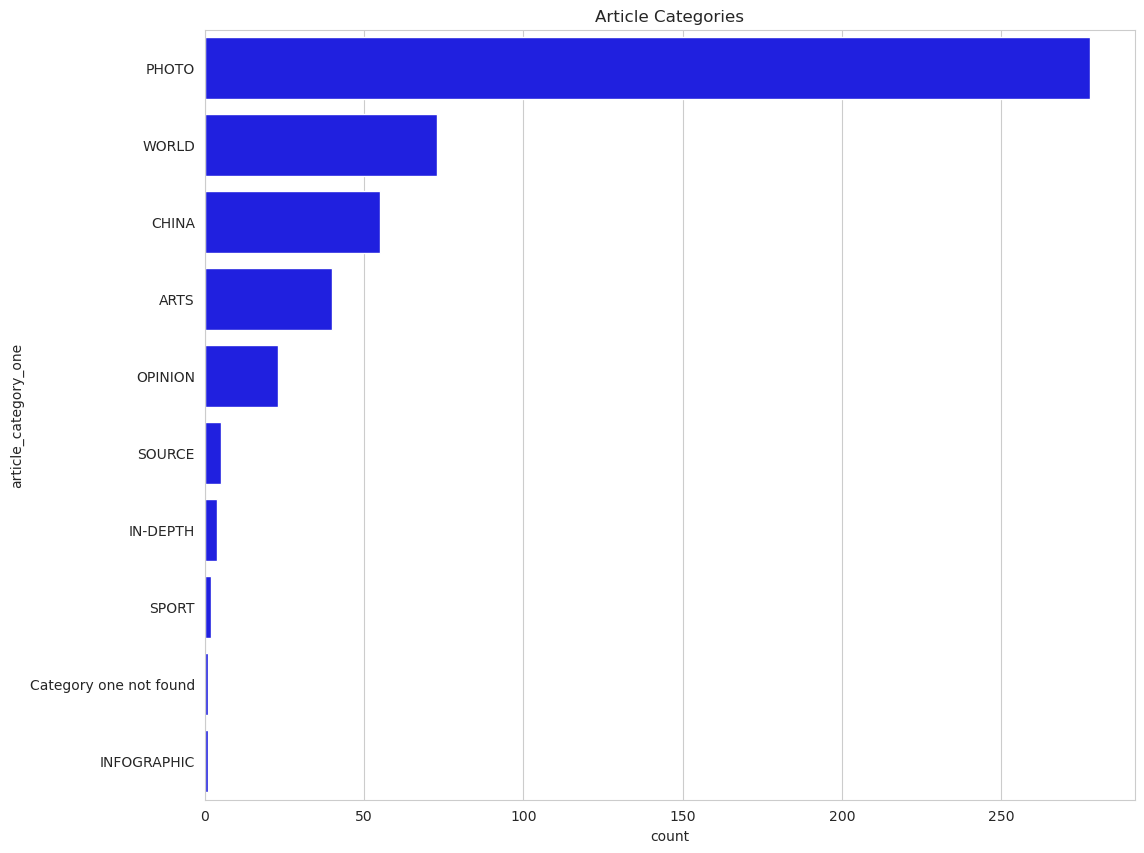

In [33]:
#sns countplot for article categories
plt.figure(figsize=(12, 10))
sns.countplot(y=df['article_category_one'], order=df['article_category_one'].value_counts().index, color='blue')
plt.title('Article Categories')


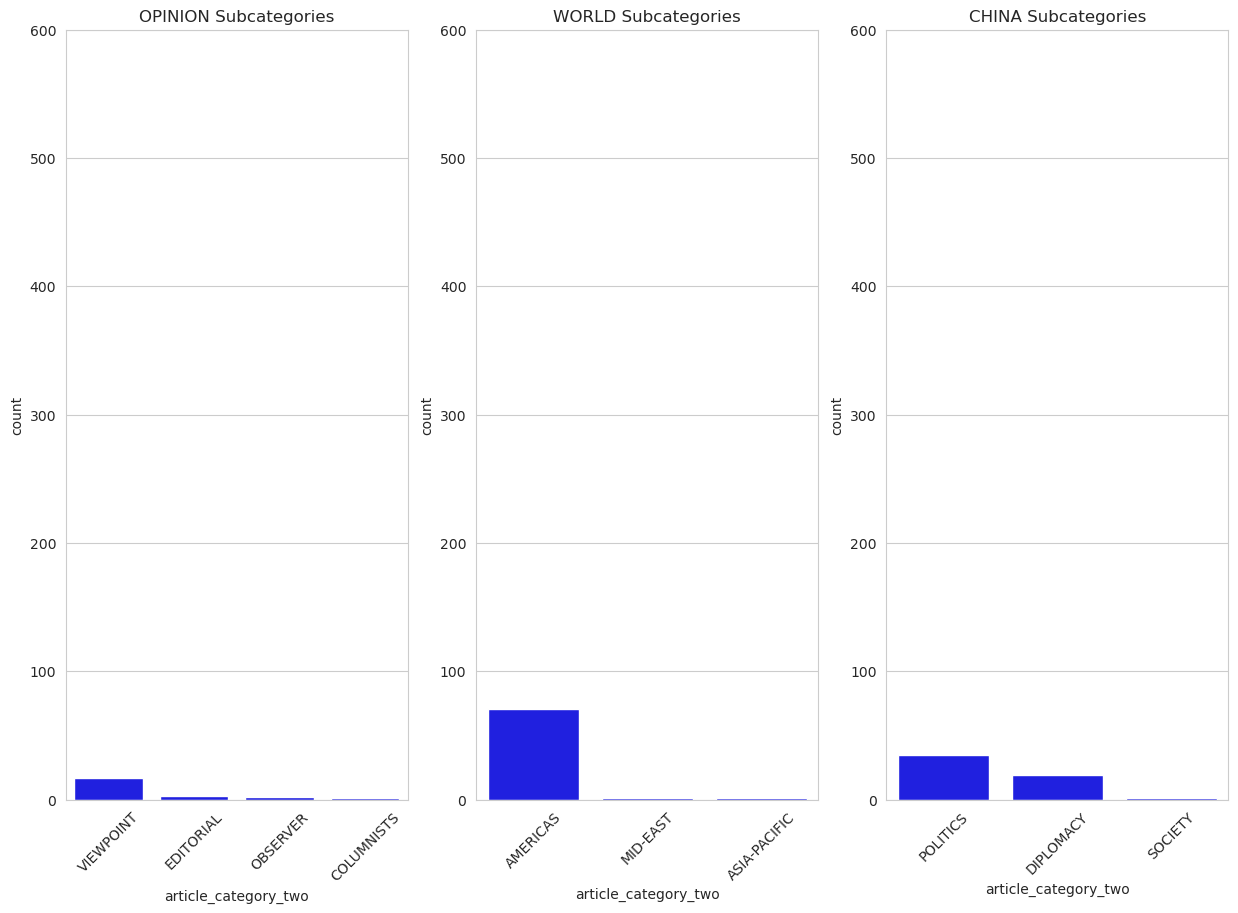

In [34]:
#plot for category one = opinion
#3 plots in a row
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['article_category_one'] == 'OPINION']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'OPINION']['article_category_two'].value_counts().index )
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.title('OPINION Subcategories')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['article_category_one'] == 'WORLD']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'WORLD']['article_category_two'].value_counts().index)
plt.title('WORLD Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 300)

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['article_category_one'] == 'CHINA']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'CHINA']['article_category_two'].value_counts().index)
plt.title('CHINA Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.show()


### POS: diplomacy vs columnists

In [35]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="RB" and word.isalpha() and word not in stop_words])


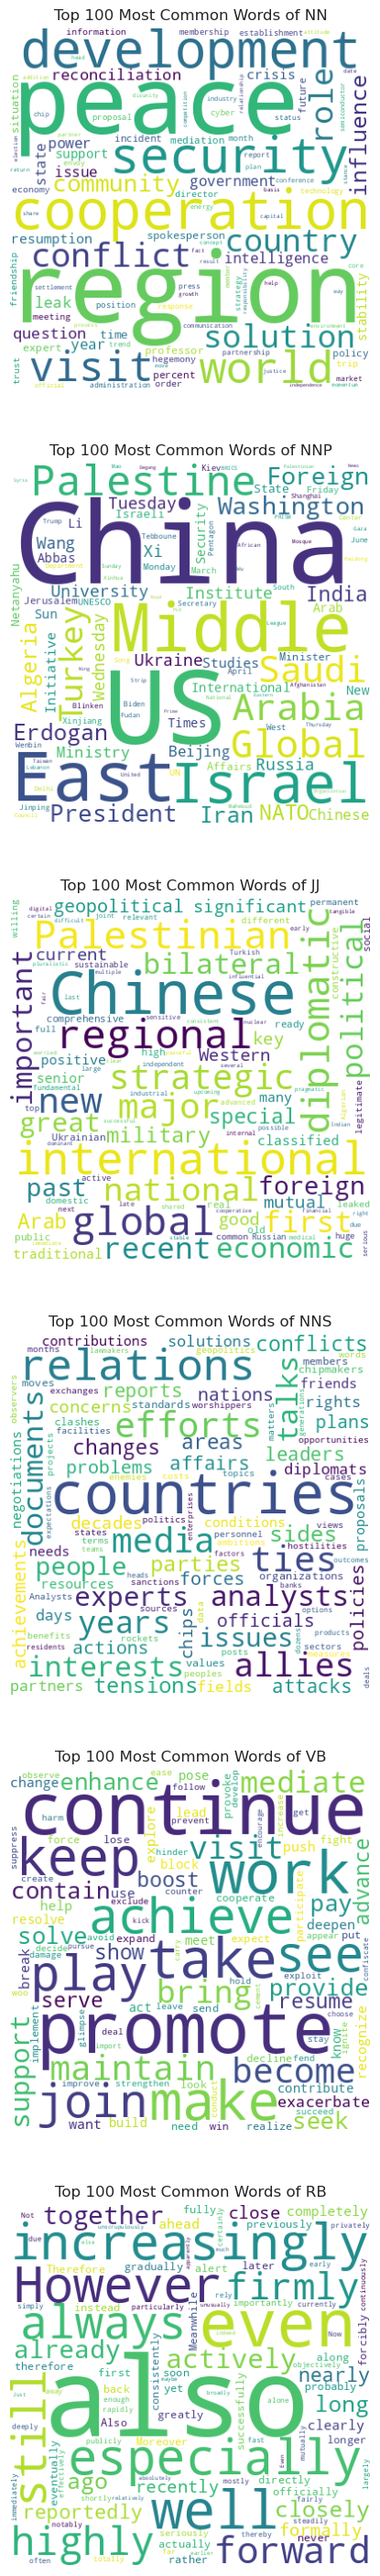

In [36]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


In [37]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="RB" and word.isalpha() and word not in stop_words])


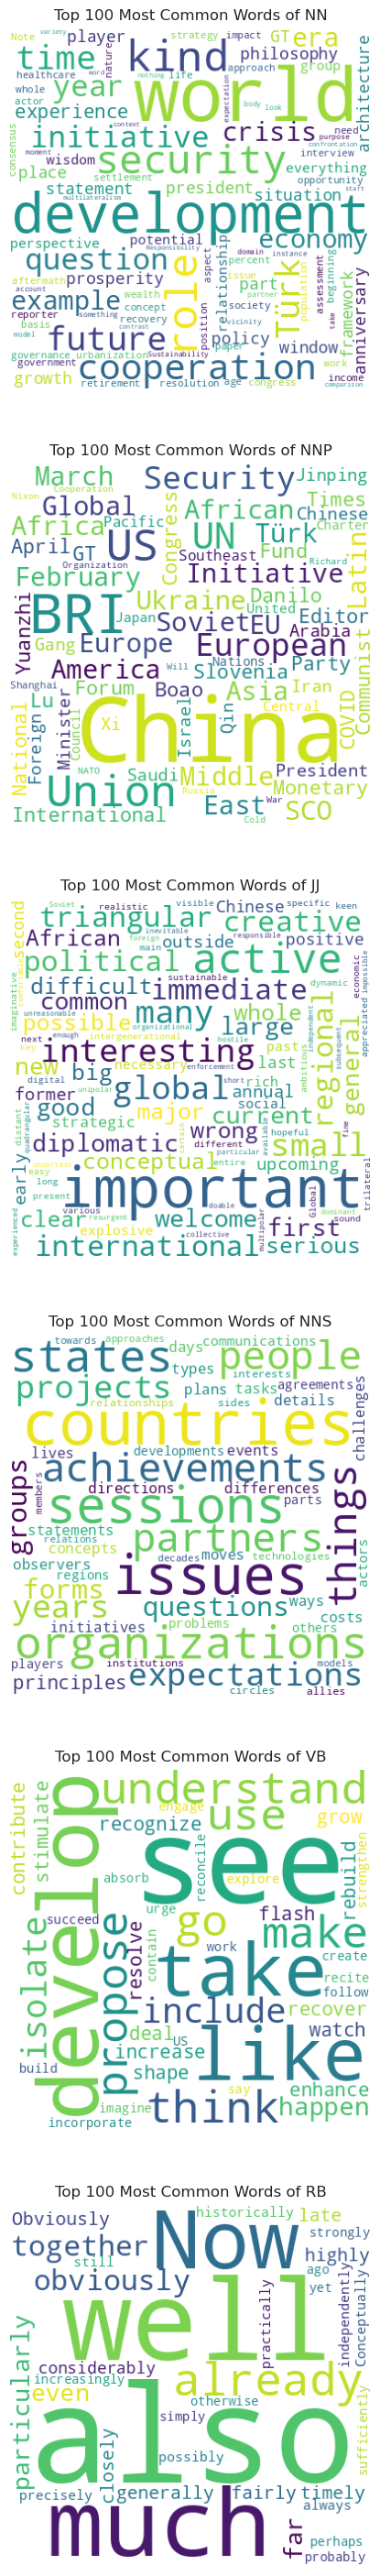

In [38]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()
